# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.


In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!python.exe -m pip install --upgrade pip  ## Upgrade to the latest version

In [10]:
import tensorflow as tf


In [11]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.11.0
Keras Version 2.11.0


---
---

# Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification


In [13]:
import pandas as pd
df1 = pd.read_csv('wine.csv')

In [14]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [15]:
df1.shape

(1599, 12)

---
---

# Q3. Check for null values, identify categorical variables, and encode them.


In [16]:
df1.isnull().sum().sum()

0

In [17]:
cat_col=[feature for feature in df1.columns if df1[feature].dtype=='O']
df1[cat_col]

,quality
0,bad
1,bad
2,bad
3,good
4,bad
...,...
1594,bad
1595,good
1596,good
1597,bad


In [18]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

q_encode = encode.fit_transform(df1["quality"])
q_encode

array([0, 0, 0, ..., 1, 0, 1])

In [19]:
df1["quality"] = pd.DataFrame(q_encode)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


---
---

# Q4. Separate the features and target variables from the dataframe.


In [20]:
X = df1.drop("quality", axis = 1)
Y = df1["quality"]

In [21]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [22]:
Y.head(3)

0    0
1    0
2    0
Name: quality, dtype: int32

---
---

# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.


In [32]:
from sklearn.model_selection import train_test_split

x_trainF, x_test, y_trainF, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainF, y_trainF, test_size=0.2, random_state=42)

In [33]:
print(x_train.shape, x_test.shape, x_valid.shape, x_trainF.shape)


(895, 11) (480, 11) (224, 11) (1119, 11)


---
---

# Q6. Perform scaling on the dataset.


In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [34]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_valid = scale.transform(x_valid)

---
---

# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.


In [28]:
layers = ([
    tf.keras.layers.Dense(100, activation = "relu", input_shape = x_train.shape[1:]),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(2)
])

---
---

# Q8. Create a Sequential model and add all the layers to it.


In [41]:
model = tf.keras.Sequential(layers)

---
---

# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.


In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)
tensorboard_callback

---
---

# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.


In [44]:
Early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

---
---

# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.


In [45]:
save_best = "Model.h5"
MOdel_checkPoint = tf.keras.callbacks.ModelCheckpoint(save_best, save_best_only=True)

---
---

# Q12. Print the model summary.


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 2,232
Trainable params: 2,232
Non-trainable params: 0
_________________________________________________________________


---
---

# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].


In [49]:
Optimizer="adam" 
Loss="binary_crossentropy", 
Metrics=["accuracy"]

---
---

# Q14. Compile the model with the specified loss function, optimizer, and metrics.


In [50]:
model.compile(optimizer = Optimizer, loss = Loss, metrics = Metrics)

---
---

# Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.


In [51]:
his1 = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), callbacks=[tensorboard_callback])

Epoch 1/20
28/28 [==============================] - 2s 25ms/step - loss: 0.5822 - accuracy: 0.5598 - val_loss: 0.8603 - val_accuracy: 0.5670
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 0.5431 - accuracy: 0.5274 - val_loss: 0.7998 - val_accuracy: 0.5491
Epoch 3/20
28/28 [==============================] - 0s 8ms/step - loss: 0.5356 - accuracy: 0.5263 - val_loss: 0.8265 - val_accuracy: 0.5491
Epoch 4/20
28/28 [==============================] - 0s 9ms/step - loss: 0.5281 - accuracy: 0.5709 - val_loss: 0.8764 - val_accuracy: 0.5714
Epoch 5/20
28/28 [==============================] - 0s 8ms/step - loss: 0.5200 - accuracy: 0.5989 - val_loss: 0.9213 - val_accuracy: 0.5491
Epoch 6/20
28/28 [==============================] - 0s 15ms/step - loss: 0.5479 - accuracy: 0.5061 - val_loss: 1.0496 - val_accuracy: 0.5848
Epoch 7/20
28/28 [==============================] - 0s 8ms/step - loss: 0.6158 - accuracy: 0.6011 - val_loss: 0.9296 - val_accuracy: 0.5893
Epoch 8/20
28/28 [

In [52]:
tensorboard --logdir=./logs

---
---

# Q16. Get the model's parameters.


In [54]:
his1.params

{'verbose': 1, 'epochs': 20, 'steps': 28}

---
---

# Q17. Store the model's training history as a Pandas DataFrame.


In [59]:
model_his = pd.DataFrame(his1.history)
model_his

,loss,accuracy,val_loss,val_accuracy
0,0.582229,0.559777,0.860305,0.566964
1,0.543142,0.527374,0.799847,0.549107
2,0.535601,0.526257,0.826518,0.549107
3,0.528104,0.570950,0.876438,0.571429
4,0.520015,0.598883,0.921294,0.549107
5,0.547931,0.506145,1.049649,0.584821
6,0.615845,0.601117,0.929649,0.589286
7,0.540119,0.565363,0.921787,0.616071
8,0.534455,0.541899,0.881468,0.468750
9,0.544707,0.452514,0.890028,0.455357


In [ ]:
model_his.to_csv('path_to_save_file.csv', index=False)

---
---

# Q18. Plot the model's training history.


<AxesSubplot:>

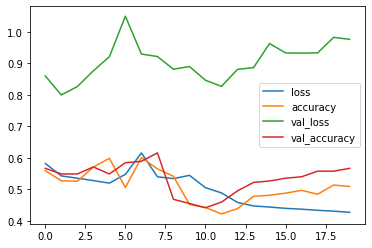

In [61]:
model_his.plot()

---
---

# Q19. Evaluate the model's performance using the test data.

In [62]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.4750


[0.6690787076950073, 0.4749999940395355]

$ End $